### Understanding Support Vector Machine

The goal of this tutorial is to implement SVM from scratch after brief explanation.

### Introduction to SVM

SVM is one of the most popular approach in Machine Learning. Almost every AI book contains a chapter for SVM. There are many reasons why SVM is so important.  
		Following properties of SVM are important ones.
		<ul>
			<li> 
			SVM construct a maximum margin classifier, which finds a decision boundary with the largest distance to training instances. A classifier with the largest distance to training instances generalize well.
			According to <b>VC Analysis</b>, large margins imply smaller VC Dimension, smaller Growth function. Since SVM construct a maximum margin classifiert, it generalizes well, <a href="https://youtu.be/eHsErlPJWUU?t=8m7s">short expalanation by Professor Yaser Abu-Mostafa</a>. 
			</li>
			<p></p>
      		<li> For finding model parameter, <b>Kernel Trick</b> can be used. Kernel Trick is nothing but simply mapping the data into a higher-dimensional space without knowing the mapping.  SVM finds a decision boundary which maximizes the margin on any dataset, provided that data is linearly separable. Thank to Kernel Trick, dataset which is not linearly separable in the original input space are easily separable in the higher-dimensional space. The high-dimensional linear separator is actually nonlinear in the original space while being linear in induced/high-dimensional space. In fact, Vapnik had to wait 30 years to use idea of Kernel function in SVM. The beautiful story underlies in SVM and Kernel machines is explained by great lecturer Patrick Winston, <a href="https://youtu.be/_PwhiWxHK8o?t=46m15s">source</a>.
     		</li>
     		<p></p>
     		<li> Finding a model parameter is CONVEX optimization problem as apposed to many other algorithms, such as Neural Networks.
     		</li>
       </ul>
       
Consider the two plots in below. In the left image, there are five different decision boundary which perfectly classify all training instances. From the perceptive of loss function, there is nothing to worry, right?! However intutively, some examples are very close to the decision boundary. If one ponders on datagenerating process, this closeness is worring.

[PLOTS] !

SVM adress this issue of closeness to decision boundary; find a parametrization/decision boundary which correctly classfies all training points while keeping the margin as large as possible. More specifically, instead of minimizing expected empirical loss on the training data, SVM attempts to minimize expected generalization loss. We don’t know where the as-yet-unseen points may fall, but under the probabilistic assumption that they are drawn from the same distribution as the previously seen examples, there are some arguments from computational learning theory suggesting that we minimize generalization loss by choosing the separator that is farthest away from the examples we have seen so far.

### How to find Model Parameters

stochastic gradient descent could be used as it is commonly applied in other models however dual representation -> solution is always linear combination of training points -> quadratic programming -> lagrange multipliers -> KErnels
BINGO!

In [4]:
import pandas as pd
from sklearn import svm
import matplotlib.pyplot as plt
import numpy as np
from pylab import rand

In [5]:
##Linearly sepearable Data
X = pd.DataFrame(np.array([
    [2, 4],
    [4, 2],
    [3, 3],
    [4, 4],
    [3, 5],
    [5, 3],
]))
y =pd.Series(np.array([-1,-1,-1,1,1,1]))

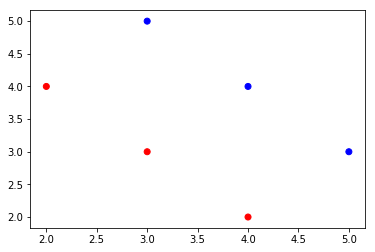

In [6]:
col = np.where(y>0,'b','r')

plt.scatter(X.iloc[:,0],X.iloc[:,1],c=col,)
plt.show()

In [7]:
def plot(kernel,C):
    #model = svm.SVC(kernel=kernel, gamma=0.7, C=C)
    model = svm.SVC(kernel=kernel)

    model.fit(X, y)
    plt.scatter(X.iloc[ :, 0 ], X.iloc[ :, 1 ], c=col, s=30, cmap=plt.cm.Paired)

    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    # create grid to evaluate model
    xx = np.linspace(xlim[ 0 ], xlim[ 1 ], 30)
    yy = np.linspace(ylim[ 0 ], ylim[ 1 ], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([ XX.ravel(), YY.ravel() ]).T
    Z = model.decision_function(xy).reshape(XX.shape)
    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[ -1, 0, 1 ], alpha=0.5, linestyles=[ '--', '-', '--' ])
    # plot support vectors
    ax.scatter(model.support_vectors_[ :, 0 ], model.support_vectors_[ :, 1 ], linewidth=1, facecolors='none')
    plt.show()

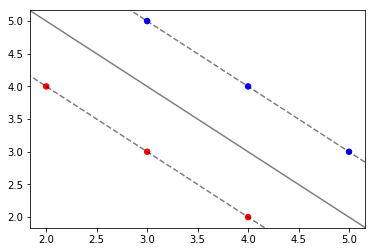

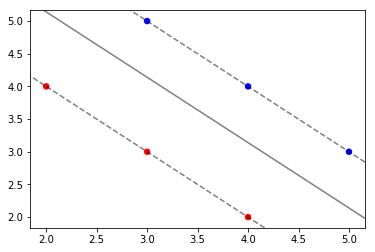

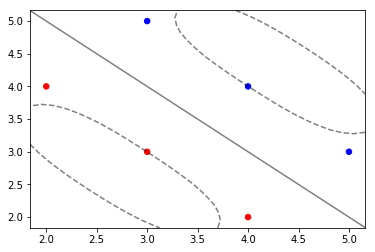

In [9]:

plot("linear", 0.5)
plot("poly", 0.2)
plot("rbf", 1)





